In [13]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
cols=['s_len','s_wid','p_len','p_wid','class']

In [5]:
df.columns=cols

In [6]:
df

,s_len,s_wid,p_len,p_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isna().sum()

s_len    0
s_wid    0
p_len    0
p_wid    0
class    0
dtype: int64

In [9]:
col=['s_len','s_wid','p_len','p_wid']
for c in col:
    df=df[df[c]>=0]

In [10]:
df.dtypes

s_len    float64
s_wid    float64
p_len    float64
p_wid    float64
class     object
dtype: object

In [12]:
for c in col:
    zs=(df[c]-df[c].mean())/df[c].std()
    out=zs>3
    df=df[~out]


In [14]:
le=LabelEncoder()

In [15]:
df['class']=le.fit_transform(df['class'])

In [16]:
df

,s_len,s_wid,p_len,p_wid,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [17]:
df['class'].unique()

array([0, 1, 2])

In [19]:
x=df[['s_len','s_wid','p_len','p_wid']]
y=df['class']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [21]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [22]:
y1=lr.predict(x_test)

In [23]:
a1=accuracy_score(y_test,y1)
a1

0.9666666666666667

In [24]:
gb=GaussianNB()

In [25]:
gb.fit(x_train,y_train)

GaussianNB()

In [26]:
y2=gb.predict(x_test)

In [27]:
a2=accuracy_score(y_test,y2)
a2

0.9333333333333333

In [28]:
mb=MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [29]:
y3=mb.predict(x_test)

In [30]:
a3=accuracy_score(y_test,y3)
a3

0.8333333333333334

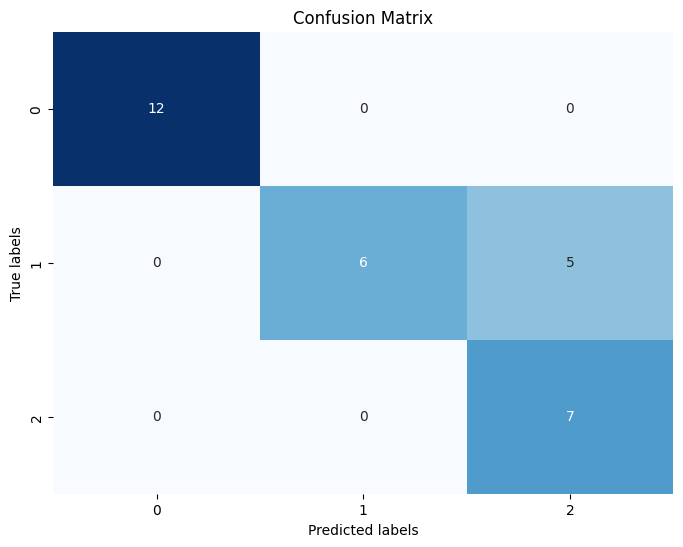